In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [2]:
# read files
users = pd.read_csv('takehome_users.csv', encoding = 'ISO-8859-1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
user_engagement = pd.read_csv('takehome_user_engagement.csv')
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [6]:
users['creation_time'] = pd.to_datetime(users['creation_time'], format='%Y-%m-%d %H:%M:%S')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [7]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'], format='%Y-%m-%d %H:%M:%S')
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [9]:
user_engagement = user_engagement.groupby(['user_id', pd.Grouper(key='time_stamp', freq='W')]).sum().reset_index()
user_engagement.head()

,user_id,time_stamp,visited
0,1,2014-04-27,1
1,2,2013-11-17,1
2,2,2013-12-01,1
3,2,2013-12-15,1
4,2,2013-12-29,1


In [10]:
user_engagement['adopted'] = np.where(user_engagement['visited'] >= 3, 1, 0)
user_engagement.head()

,user_id,time_stamp,visited,adopted
0,1,2014-04-27,1,0
1,2,2013-11-17,1,0
2,2,2013-12-01,1,0
3,2,2013-12-15,1,0
4,2,2013-12-29,1,0


In [11]:
user_engagement = user_engagement[['user_id', 'visited', 'adopted']].drop_duplicates()
user_engagement.head()

,user_id,visited,adopted
0,1,1,0
1,2,1,0
7,2,3,1
8,2,2,0
12,3,1,0


In [12]:
user_counts = pd.DataFrame(user_engagement['user_id'].value_counts()).reset_index()
user_counts = user_counts.rename(columns={'index':'user_id', 'user_id':'idcount'})
user_counts.head()

,user_id,idcount
0,4143,7
1,4965,7
2,5552,7
3,7375,7
4,1434,7


In [13]:
user_engagement = pd.merge(user_engagement, user_counts, left_on='user_id', right_on='user_id')
user_engagement.head()

,user_id,visited,adopted,idcount
0,1,1,0,1
1,2,1,0,3
2,2,3,1,3
3,2,2,0,3
4,3,1,0,1


In [14]:
user_engagement = user_engagement.drop(user_engagement.loc[(user_engagement['idcount']>1) & (user_engagement['adopted']==0)].index)
user_engagement.head()

,user_id,visited,adopted,idcount
0,1,1,0,1
2,2,3,1,3
4,3,1,0,1
5,4,1,0,1
6,5,1,0,1


In [15]:
user_engagement = user_engagement[['user_id', 'adopted']].drop_duplicates()
user_engagement['user_id'].value_counts()

2047     1
3475     1
11607    1
5464     1
5472     1
        ..
2788     1
4839     1
8937     1
2796     1
2049     1
Name: user_id, Length: 8317, dtype: int64

In [16]:
df = pd.merge(users, user_engagement, left_on='object_id', right_on='user_id')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,3,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,4,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8317 entries, 0 to 8316
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   8317 non-null   int64         
 1   creation_time               8317 non-null   datetime64[ns]
 2   name                        8317 non-null   object        
 3   email                       8317 non-null   object        
 4   creation_source             8317 non-null   object        
 5   last_session_creation_time  8317 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    8317 non-null   int64         
 7   enabled_for_marketing_drip  8317 non-null   int64         
 8   org_id                      8317 non-null   int64         
 9   invited_by_user_id          4476 non-null   float64       
 10  user_id                     8317 non-null   int64         
 11  adopted                     8317 non-null   int64       

In [18]:
df = df.drop(['object_id', 'name', 'email', 'creation_time', 'last_session_creation_time', 'org_id', 'user_id'], axis=1)

In [19]:
df['invited'] = np.where(df['invited_by_user_id'].isnull(), 0, 1)
df = df.drop(columns='invited_by_user_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8317 entries, 0 to 8316
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   creation_source             8317 non-null   object
 1   opted_in_to_mailing_list    8317 non-null   int64 
 2   enabled_for_marketing_drip  8317 non-null   int64 
 3   adopted                     8317 non-null   int64 
 4   invited                     8317 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 389.9+ KB


In [20]:
df = pd.get_dummies(df)
df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted,invited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,0,1,1,0,0,0,0
1,0,0,1,1,0,1,0,0,0
2,0,0,0,1,0,1,0,0,0
3,0,0,0,1,1,0,0,0,0
4,0,0,0,1,1,0,0,0,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='adopted'), df['adopted'], test_size=0.2, random_state=42)

In [22]:
X_train.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
8091,0,0,0,0,0,0,1,0
937,0,1,0,0,0,0,0,1
4857,1,0,0,0,0,1,0,0
6405,0,0,1,1,0,0,0,0
4751,0,0,1,0,1,0,0,0


In [23]:
X_test.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
7403,1,1,1,1,0,0,0,0
736,1,1,1,0,1,0,0,0
7544,0,0,0,0,0,0,1,0
5594,0,0,0,0,0,0,0,1
2316,0,0,0,0,0,0,0,1


In [24]:
y_train.head()

8091    0
937     0
4857    0
6405    0
4751    0
Name: adopted, dtype: int64

In [25]:
y_test.head()

7403    0
736     0
7544    0
5594    0
2316    0
Name: adopted, dtype: int64

In [26]:
scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,-0.584235,-0.424298,-1.078366,-0.466722,-0.748024,-0.304050,1.900982,-0.438026
1,-0.584235,2.356837,-1.078366,-0.466722,-0.748024,-0.304050,-0.526044,2.282970
2,1.711640,-0.424298,-1.078366,-0.466722,-0.748024,3.288929,-0.526044,-0.438026
3,-0.584235,-0.424298,0.927329,2.142605,-0.748024,-0.304050,-0.526044,-0.438026
4,-0.584235,-0.424298,0.927329,-0.466722,1.336855,-0.304050,-0.526044,-0.438026


In [27]:
X_test_scaled = scale.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1.711640,2.356837,0.927329,2.142605,-0.748024,-0.30405,-0.526044,-0.438026
1,1.711640,2.356837,0.927329,-0.466722,1.336855,-0.30405,-0.526044,-0.438026
2,-0.584235,-0.424298,-1.078366,-0.466722,-0.748024,-0.30405,1.900982,-0.438026
3,-0.584235,-0.424298,-1.078366,-0.466722,-0.748024,-0.30405,-0.526044,2.282970
4,-0.584235,-0.424298,-1.078366,-0.466722,-0.748024,-0.30405,-0.526044,2.282970


In [28]:
# logistic regression
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1408    0]
 [ 256    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1408
           1       0.00      0.00      0.00       256

    accuracy                           0.85      1664
   macro avg       0.42      0.50      0.46      1664
weighted avg       0.72      0.85      0.78      1664



/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# logistic regression scaled data
lg = LogisticRegression()
lg.fit(X_train_scaled, y_train)
y_pred = lg.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1408    0]
 [ 256    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1408
           1       0.00      0.00      0.00       256

    accuracy                           0.85      1664
   macro avg       0.42      0.50      0.46      1664
weighted avg       0.72      0.85      0.78      1664



/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# decision tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1408    0]
 [ 256    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1408
           1       0.00      0.00      0.00       256

    accuracy                           0.85      1664
   macro avg       0.42      0.50      0.46      1664
weighted avg       0.72      0.85      0.78      1664



/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# decision tree scaled data
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)
y_pred = tree.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1408    0]
 [ 256    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1408
           1       0.00      0.00      0.00       256

    accuracy                           0.85      1664
   macro avg       0.42      0.50      0.46      1664
weighted avg       0.72      0.85      0.78      1664



/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# knn
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1370   38]
 [ 249    7]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1408
           1       0.16      0.03      0.05       256

    accuracy                           0.83      1664
   macro avg       0.50      0.50      0.48      1664
weighted avg       0.74      0.83      0.77      1664



In [33]:
# knn scaled data
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1335   73]
 [ 242   14]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      1408
           1       0.16      0.05      0.08       256

    accuracy                           0.81      1664
   macro avg       0.50      0.50      0.49      1664
weighted avg       0.74      0.81      0.77      1664



In [34]:
# random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1408    0]
 [ 256    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1408
           1       0.00      0.00      0.00       256

    accuracy                           0.85      1664
   macro avg       0.42      0.50      0.46      1664
weighted avg       0.72      0.85      0.78      1664



/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Looks like most modeling methods will be giving us the same results. No need to test the scaled data for these models.

In [35]:
# gradient boosting
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1408    0]
 [ 256    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1408
           1       0.00      0.00      0.00       256

    accuracy                           0.85      1664
   macro avg       0.42      0.50      0.46      1664
weighted avg       0.72      0.85      0.78      1664



/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Same results for every modeling method except for knn.

Minimum error:- 0.15384615384615385 at K = 1


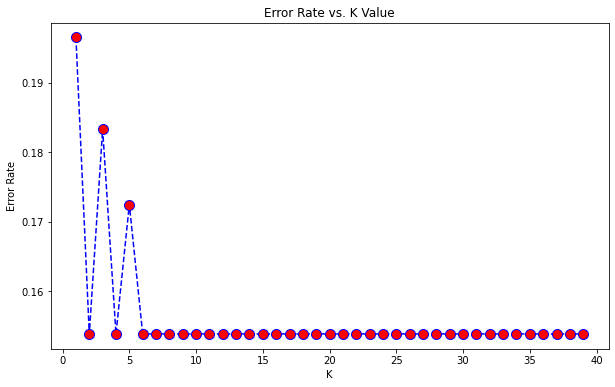

In [36]:
error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [37]:
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)))
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1319   89]
 [ 238   18]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1408
           1       0.17      0.07      0.10       256

    accuracy                           0.80      1664
   macro avg       0.51      0.50      0.49      1664
weighted avg       0.74      0.80      0.77      1664



Minimum error:- 0.15384615384615385 at K = 1


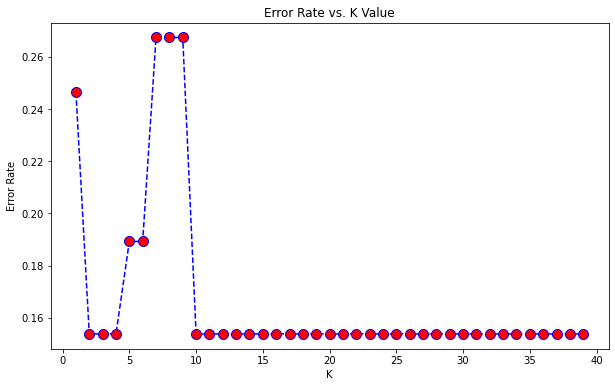

In [38]:
# scaled data
error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled,y_train)
  y_pred = knn.predict(X_test_scaled)
  error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [39]:
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)))
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1223  185]
 [ 225   31]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1408
           1       0.14      0.12      0.13       256

    accuracy                           0.75      1664
   macro avg       0.49      0.49      0.49      1664
weighted avg       0.74      0.75      0.74      1664



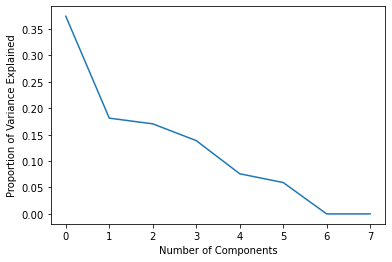

In [40]:
pca = PCA()
pca.fit(X_train)

variance = pca.explained_variance_ratio_

plt.plot(range(len(variance)), variance)
plt.xlabel("Number of Components")
plt.ylabel("Proportion of Variance Explained")
plt.show()

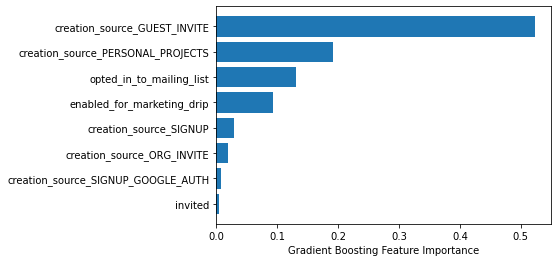

In [41]:
sorted = gbc.feature_importances_.argsort()
plt.barh(X_train.columns[sorted], gbc.feature_importances_[sorted])
plt.xlabel("Gradient Boosting Feature Importance")
plt.show()